In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtplt
import datetime as dt
import seaborn as sns

In [2]:
CUSTOMERS=pd.read_csv('CUSTOMERS.csv')
ORDERS=pd.read_csv('ORDERS.csv')
GEO_LOCATION=pd.read_csv('GEO_LOCATION.csv')
SELLERS=pd.read_csv('SELLERS.csv')
ORDER_ITEMS=pd.read_csv('ORDER_ITEMS.csv')
ORDER_REVIEW_RATINGS=pd.read_csv('ORDER_REVIEW_RATINGS.csv')
ORDER_PAYMENTS=pd.read_csv('ORDER_PAYMENTS.csv')
PRODUCTS=pd.read_csv('PRODUCTS.csv')

In [3]:
print('CUSTOMERS : ',CUSTOMERS.columns,'\n'
'ORDERS : ',ORDERS.columns,'\n'
'GEO_LOCATION : ',GEO_LOCATION.columns,'\n'
'SELLERS : ',SELLERS.columns,'\n'
'ORDER_ITEMS : ',ORDER_ITEMS.columns,'\n'
'ORDER_REVIEW_RATINGS : ',ORDER_REVIEW_RATINGS.columns,'\n'
'ORDER_PAYMENTS : ',ORDER_PAYMENTS.columns,'\n'
'PRODUCTS : ',PRODUCTS.columns)

CUSTOMERS :  Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object') 
ORDERS :  Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object') 
GEO_LOCATION :  Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object') 
SELLERS :  Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object') 
ORDER_ITEMS :  Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object') 
ORDER_REVIEW_RATINGS :  Index(['review_id', 'order_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object') 
ORDER_PAYMENTS :  Inde

In [4]:
#CUSTOMERS.isna().sum()
#GEO_LOCATION.isna().sum()
#ORDER_ITEMS.isna().sum()
#ORDER_REVIEW_RATINGS.isna().sum()
#ORDER_PAYMENTS.isna().sum()

#Missing_Value:---
#1)ORDERS.isna().sum()
#2)PRODUCTS.isna().sum()
#3)SELLERS.isna().sum()

In [5]:
#ORDERS.isna().sum()

In [6]:
#ORDERS.dtypes

In [7]:
#changing data types
ORDERS['order_purchase_timestamp']=ORDERS.order_purchase_timestamp.astype(np.datetime64)
ORDERS['order_approved_at']=ORDERS.order_approved_at.astype(np.datetime64)
ORDERS['order_delivered_carrier_date']=ORDERS.order_delivered_carrier_date.astype(np.datetime64)
ORDERS['order_delivered_customer_date']=ORDERS.order_delivered_customer_date.astype(np.datetime64)
ORDERS['order_estimated_delivery_date']=ORDERS.order_estimated_delivery_date.astype(np.datetime64)


In [8]:
#missing value treatment
ORDERS=ORDERS.dropna()

In [9]:
#PRODUCTS.isna().sum()

In [10]:
#PRODUCTS.dtypes

In [11]:
#missing value treatment
PRODUCTS=PRODUCTS.dropna()

In [12]:
#SELLERS.isna().sum()

In [13]:
#SELLERS.dtypes

In [14]:
#missing value treatment
SELLERS=SELLERS.dropna()

### CUSTOMERS_360:

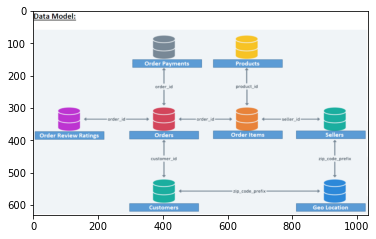

In [15]:
plt.imshow(mtplt.image.imread('Screenshot.png'))

In [16]:
#1)CUSTOMERS - ORDERS
CUSTOMERS_ORDERS=CUSTOMERS.merge(ORDERS,on='customer_id',how='inner',validate='one_to_many').dropna()

In [17]:
#2)CUSTOMERS_ORDERS - ORDER_ITEMS
CUSTOMERS_ORDERS_ORDER_ITEMS=CUSTOMERS_ORDERS.merge(ORDER_ITEMS,on='order_id',how='inner',validate='one_to_many').dropna()

In [18]:
#3)CUSTOMERS_ORDERS_ORDER_ITEMS - ORDER_PAYMENTS
CUSTOMERS_ORDERS_ORDER_ITEMS_ORDER_PAYMENTS=CUSTOMERS_ORDERS_ORDER_ITEMS.merge(ORDER_PAYMENTS,on='order_id',how='left').dropna()

In [19]:
#4)CUSTOMERS_ORDERS_ORDER_ITEMS_ORDER_PAYMENTS - ORDER_REVIEW_RATINGS
CUSTOMERS_ORDERS_ORDER_ITEMS_ORDER_PAYMENTS_ORDER_REVIEW_RATINGS=CUSTOMERS_ORDERS_ORDER_ITEMS_ORDER_PAYMENTS.merge(ORDER_REVIEW_RATINGS,on='order_id',how='inner').dropna()

In [20]:
#5)CUSTOMERS_ORDERS_ORDER_ITEMS_ORDER_PAYMENTS_ORDER_REVIEW_RATINGS - PRODUCTS
CUSTOMERS_ORDERS_ORDER_ITEMS_ORDER_PAYMENTS_ORDER_REVIEW_RATINGS_PRODUCTS=CUSTOMERS_ORDERS_ORDER_ITEMS_ORDER_PAYMENTS_ORDER_REVIEW_RATINGS.merge(PRODUCTS,on='product_id',how='inner').dropna()

In [21]:
#6)CUSTOMERS_ORDERS_ORDER_ITEMS_ORDER_PAYMENTS_ORDER_REVIEW_RATINGS_PRODUCTS - GEO_LOCATION
CUSTOMERS_ORDERS_ORDER_ITEMS_ORDER_PAYMENTS_ORDER_REVIEW_RATINGS_PRODUCTS_GEO_LOCATION=CUSTOMERS_ORDERS_ORDER_ITEMS_ORDER_PAYMENTS_ORDER_REVIEW_RATINGS_PRODUCTS.merge(GEO_LOCATION,left_on=['customer_zip_code_prefix'],right_on=['geolocation_zip_code_prefix'],how='inner',validate="many_to_one").dropna()

In [22]:
#7)CUSTOMERS_ORDERS_ORDER_ITEMS_ORDER_PAYMENTS_ORDER_REVIEW_RATINGS_PRODUCTS_GEO_LOCATION - SELLERS
CUSTOMERS_ORDERS_ORDER_ITEMS_ORDER_PAYMENTS_ORDER_REVIEW_RATINGS_PRODUCTS_GEO_LOCATION_SELLERS=CUSTOMERS_ORDERS_ORDER_ITEMS_ORDER_PAYMENTS_ORDER_REVIEW_RATINGS_PRODUCTS_GEO_LOCATION.merge(SELLERS,left_on=['seller_id','customer_zip_code_prefix'],right_on=['seller_id','seller_zip_code_prefix'],how='left',validate="many_to_one").dropna().reset_index()

In [23]:
CUSTOMERS_ORDERS_ORDER_ITEMS_ORDER_PAYMENTS_ORDER_REVIEW_RATINGS_PRODUCTS_GEO_LOCATION_SELLERS.count()

index                            26
customer_id                      26
customer_unique_id               26
customer_zip_code_prefix         26
customer_city                    26
customer_state                   26
order_id                         26
order_status                     26
order_purchase_timestamp         26
order_approved_at                26
order_delivered_carrier_date     26
order_delivered_customer_date    26
order_estimated_delivery_date    26
order_item_id                    26
product_id                       26
seller_id                        26
shipping_limit_date              26
price                            26
freight_value                    26
payment_sequential               26
payment_type                     26
payment_installments             26
payment_value                    26
review_id                        26
review_score                     26
review_creation_date             26
review_answer_timestamp          26
product_category_name       

In [24]:
#CUSTOMERS_ORDERS_ORDER_ITEMS_ORDER_PAYMENTS_ORDER_REVIEW_RATINGS_PRODUCTS_GEO_LOCATION_SELLERS

In [25]:
CUSTOMERS_ORDERS_ORDER_ITEMS_ORDER_PAYMENTS_ORDER_REVIEW_RATINGS_PRODUCTS_GEO_LOCATION_SELLERS[['customer_zip_code_prefix','geolocation_zip_code_prefix','seller_zip_code_prefix']]

,customer_zip_code_prefix,geolocation_zip_code_prefix,seller_zip_code_prefix
0,35570,35570,35570.0
1,35570,35570,35570.0
2,80230,80230,80230.0
3,89560,89560,89560.0
4,89560,89560,89560.0
5,15025,15025,15025.0
6,85812,85812,85812.0
7,85801,85801,85801.0
8,90010,90010,90010.0
9,8290,8290,8290.0


In [26]:
CUSTOMERS_ORDERS_ORDER_ITEMS_ORDER_PAYMENTS_ORDER_REVIEW_RATINGS_PRODUCTS_GEO_LOCATION_SELLERS[['customer_city','customer_state','geolocation_city','geolocation_state','seller_city','seller_state']]

,customer_city,customer_state,geolocation_city,geolocation_state,seller_city,seller_state
0,Gohana,Haryana,Gohana,Haryana,Gohana,Haryana
1,Gohana,Haryana,Gohana,Haryana,Gohana,Haryana
2,Anakapalle,Andhra Pradesh,Anakapalle,Andhra Pradesh,Anakapalle,Andhra Pradesh
3,Ahmedabad Cantonment,Gujarat,Ahmedabad Cantonment,Gujarat,Ahmedabad Cantonment,Gujarat
4,Ahmedabad Cantonment,Gujarat,Ahmedabad Cantonment,Gujarat,Ahmedabad Cantonment,Gujarat
5,Kallur,Andhra Pradesh,Kallur,Andhra Pradesh,Kallur,Andhra Pradesh
6,Dommara Nandyal,Andhra Pradesh,Dommara Nandyal,Andhra Pradesh,Dommara Nandyal,Andhra Pradesh
7,Dommara Nandyal,Andhra Pradesh,Dommara Nandyal,Andhra Pradesh,Dommara Nandyal,Andhra Pradesh
8,Eluru,Andhra Pradesh,Eluru,Andhra Pradesh,Eluru,Andhra Pradesh
9,Akkarampalle,Andhra Pradesh,Akkarampalle,Andhra Pradesh,Akkarampalle,Andhra Pradesh


In [27]:
CUSTOMERS360=CUSTOMERS_ORDERS_ORDER_ITEMS_ORDER_PAYMENTS_ORDER_REVIEW_RATINGS_PRODUCTS_GEO_LOCATION_SELLERS

In [28]:
CUSTOMERS_360=CUSTOMERS360.drop(['seller_state','seller_city','seller_zip_code_prefix','geolocation_state','geolocation_city','geolocation_zip_code_prefix'],axis=1)

In [29]:
CUSTOMERS_360.columns

Index(['index', 'customer_id', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'geolocation_lat', 'geolocation_lng'],
      dtype='object')

In [30]:
CUSTOMERS_360.to_excel('CUST_360.xlsx')

# Business Objective:

# 1. Perform Detailed exploratory analysis

### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [31]:
#revenue= unit sold * Price

#Total Revenue
CUSTOMERS_360.product_photos_qty*CUSTOMERS_360.payment_value
print('CUSTOMERS_360_Total_Revenue:',(CUSTOMERS_360.product_photos_qty*CUSTOMERS_360.payment_value).sum())
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS=CUSTOMERS.merge(ORDER_PAYMENTS.merge(ORDERS.merge(ORDER_ITEMS.merge(PRODUCTS,how='left',on='product_id'),how='left',on='order_id'),how='right',on='order_id'),how='inner',on='customer_id')
#CUSTOMERS_ORDERS_ORDER_PAYMENTS_PRODUCTS.columns

CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS['REVENUE']=(CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.product_photos_qty*CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.payment_value)
print('Total_Revenue:',(CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.product_photos_qty*CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.payment_value).sum())

CUSTOMERS_360_Total_Revenue: 8744.0
Total_Revenue: 43680969.85999999


In [32]:
#CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS[CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.order_status=='delivered']

In [33]:
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'REVENUE'],
      dtype='object')

In [34]:
#Total quantity
print('CUSTOMERS_360_Total_quantity:',CUSTOMERS_360.product_photos_qty.sum())
print('Total_quantity:',CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.product_photos_qty.sum())

CUSTOMERS_360_Total_quantity: 36.0
Total_quantity: 250458.0


In [35]:
#Total products 
print('CUSTOMERS_360_Total_quantity:',CUSTOMERS_360.product_id.nunique())
print('Total_products:',CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.product_id.nunique())

CUSTOMERS_360_Total_quantity: 23
Total_products: 32210


In [36]:
#Total categories
print('PRODUCTS_Total_quantity:',PRODUCTS.product_category_name.nunique())
print('Total_quantity:',CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.product_category_name.unique(),'Total_quantity:',
      CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.product_category_name.nunique(),'\n',
      '\n\n'
      ,'CUSTOMERS_360_Total_quantity:',CUSTOMERS_360.product_category_name.unique(),'\n',
      'CUSTOMERS_360_Total_quantity:',CUSTOMERS_360.product_category_name.nunique())


PRODUCTS_Total_quantity: 71
Total_quantity: ['Office_Furniture' 'Housewares' 'Home_Confort' 'Sports_Leisure'
 'Computers_Accessories' nan 'Toys' 'Furniture_Decor' 'Auto'
 'Air_Conditioning' 'Telephony' 'Health_Beauty' 'Garden_Tools' 'Pet_Shop'
 'Bed_Bath_Table' 'Baby' 'Watches_Gifts'
 'Kitchen_Dining_Laundry_Garden_Furniture' 'Perfumery' 'Art' 'Stationery'
 'Fashio_Female_Clothing' 'Consoles_Games' 'Construction_Tools_Lights'
 'Food_Drink' 'Drinks' 'Cool_Stuff' 'Fashion_Bags_Accessories'
 'Home_Construction' 'Luggage_Accessories' 'Electronics'
 'Home_Appliances_2' 'Fashion_Male_Clothing' 'Small_Appliances'
 'Small_Appliances_Home_Oven_And_Coffee' 'Books_General_Interest'
 'Home_Appliances' 'Costruction_Tools_Tools' 'Signaling_And_Security'
 'Musical_Instruments' 'Construction_Tools_Construction' 'Music'
 'Fashion_Shoes' 'Industry_Commerce_And_Business'
 'Fashion_Underwear_Beach' 'Dvds_Blu_Ray' 'Construction_Tools_Safety'
 'Food' 'Fixed_Telephony' 'Furniture_Living_Room' 'Tablets_Printi

In [37]:
#CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS=CUSTOMERS.merge(ORDER_PAYMENTS.merge(ORDERS.merge(ORDER_ITEMS.merge(PRODUCTS,how='left',on='product_id'),how='left',on='order_id'),how='right',on='order_id'),how='inner',on='customer_id')
#CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS=CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.merge(SELLERS,how='inner',right_on=['seller_id','seller_zip_code_prefix'],left_on=['seller_id','customer_zip_code_prefix'])

In [38]:
#Total sellers
print('CUSTOMERS_360_Total_sellers : ',CUSTOMERS_360.seller_id.nunique(),'\n\n',
'SELLERS_Total_sellers : ',SELLERS.seller_id.nunique())

CUSTOMERS_360_Total_sellers :  21 

 SELLERS_Total_sellers :  3038


In [39]:
#Total locations
print('CUSTOMERS_360_Total_locations : ',CUSTOMERS_360.customer_zip_code_prefix.nunique(),'\n',
      'CUSTOMERS_360_city : ',CUSTOMERS_360.customer_city.nunique(),'\n',
      'CUSTOMERS_360_State : ',CUSTOMERS_360.customer_state.nunique(),'\n\n',
'GEO_LOCATION_Total_locations : ',GEO_LOCATION.geolocation_zip_code_prefix.nunique(),'\n',
'GEO_LOCATION_Total_City : ',GEO_LOCATION.geolocation_city.nunique(),'\n',
'GEO_LOCATION_Total_State : ',GEO_LOCATION.geolocation_state.nunique())

CUSTOMERS_360_Total_locations :  20 
 CUSTOMERS_360_city :  15 
 CUSTOMERS_360_State :  4 

 GEO_LOCATION_Total_locations :  19015 
 GEO_LOCATION_Total_City :  3809 
 GEO_LOCATION_Total_State :  20


In [40]:
#Total channels

In [41]:
#Total payment methods
print('CUSTOMERS_360 Total payment : ',CUSTOMERS_360.payment_type.unique(),'\n\n',
    'Total payment : ',ORDER_PAYMENTS.payment_type.unique())

CUSTOMERS_360 Total payment :  ['credit_card' 'UPI'] 

 Total payment :  ['credit_card' 'UPI' 'voucher' 'debit_card' 'not_defined']


### b. Understanding how many new customers acquired every month

In [42]:
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS['order_purchase_timestamp_MONTH']=CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.order_purchase_timestamp.dt.month
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS['order_purchase_timestamp_YEAR']=CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.order_purchase_timestamp.dt.year

In [43]:
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS=CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.sort_values(['customer_id','order_purchase_timestamp_MONTH','order_purchase_timestamp_YEAR'])

In [44]:
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS['FLAG']=np.where(CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS[['customer_id','order_purchase_timestamp_MONTH','order_purchase_timestamp_YEAR']].duplicated()==False,'NEW', 'EXISTING')

In [45]:
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.groupby(['order_purchase_timestamp_YEAR','order_purchase_timestamp_MONTH',CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.FLAG[CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.FLAG=='NEW']])['customer_id'].count()

order_purchase_timestamp_YEAR  order_purchase_timestamp_MONTH  FLAG
2016                           9                               NEW        1
                               10                              NEW      270
                               12                              NEW        1
2017                           1                               NEW      748
                               2                               NEW     1641
                               3                               NEW     2546
                               4                               NEW     2303
                               5                               NEW     3545
                               6                               NEW     3135
                               7                               NEW     3872
                               8                               NEW     4193
                               9                               NEW     4149
                    

In [46]:
CUST=CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.groupby(['customer_id']).head(1).sort_values(by=['customer_id','order_purchase_timestamp'])
CUST_new=pd.DataFrame(CUST.groupby([CUST.order_purchase_timestamp.dt.year,CUST.order_purchase_timestamp.dt.month])['customer_id'].count())
CUST_new.index.names = ['Year','Month']
CUST_new.rename(index={'order_purchase_timestamp': 'BB','order_purchase_timestamp': 'BB'})

customer_id
Year Month             
2016 9                1
     10             270
     12               1
2017 1              748
     2             1641
     3             2546
     4             2303
     5             3545
     6             3135
     7             3872
     8             4193
     9             4149
     10            4478
     11            7288
     12            5513
2018 1             7069
     2             6556
     3             7003
     4             6798
     5             6749
     6             6096
     7             6156
     8             6351

### c. Understand the retention of customers on month on month basis

In [47]:
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.groupby(['order_purchase_timestamp_YEAR','order_purchase_timestamp_MONTH',CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.FLAG[CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.FLAG=='EXISTING']])['order_id'].count()

order_purchase_timestamp_YEAR  order_purchase_timestamp_MONTH  FLAG    
2016                           9                               EXISTING       2
                               10                              EXISTING      66
2017                           1                               EXISTING     213
                               2                               EXISTING     308
                               3                               EXISTING     532
                               4                               EXISTING     404
                               5                               EXISTING     715
                               6                               EXISTING     552
                               7                               EXISTING     854
                               8                               EXISTING     860
                               9                               EXISTING     853
                               10               

### d. How the revenues from existing/new customers on month on month basis

In [48]:
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.groupby(['order_purchase_timestamp_YEAR','order_purchase_timestamp_MONTH',CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.FLAG])['REVENUE'].sum()

order_purchase_timestamp_YEAR  order_purchase_timestamp_MONTH  FLAG    
2016                           9                               EXISTING          0.00
                                                               NEW               0.00
                               10                              EXISTING      35671.61
                                                               NEW          128457.57
                               12                              NEW              19.62
2017                           1                               EXISTING      98730.70
                                                               NEW          280376.23
                               2                               EXISTING     130054.27
                                                               NEW          594195.27
                               3                               EXISTING     203652.19
                                                               NEW  

In [49]:
#CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.to_excel('15-09-22-CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.xlsx')

### e. Understand the trends/seasonality of sales, quantity by category, location, month,week, day, time, channel, payment method etc…

In [50]:
# sales, quantity by category
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.groupby(['product_category_name'])['product_photos_qty','price','REVENUE'].sum()

<ipython-input-50-2a42fa088e10>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.groupby(['product_category_name'])['product_photos_qty','price','REVENUE'].sum()


,product_photos_qty,price,REVENUE
product_category_name,,,
Agro_Industry_And_Commerce,543.0,81877.58,222500.50
Air_Conditioning,696.0,54260.98,242248.21
Art,400.0,24176.63,51644.29
Arts_And_Craftmanship,89.0,1814.01,10145.40
Audio,699.0,52332.47,113574.21
...,...,...,...
Stationery,7444.0,231754.65,928172.81
Tablets_Printing_Image,161.0,7840.31,24162.65
Telephony,13357.0,325423.00,1336502.52


In [51]:
# sales, quantity by location
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.groupby(['customer_state','customer_city'])['product_photos_qty','price','REVENUE'].sum()

<ipython-input-51-e97e7437c692>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.groupby(['customer_state','customer_city'])['product_photos_qty','price','REVENUE'].sum()


product_photos_qty       price     REVENUE
customer_state customer_city                                                
Andhra Pradesh Adilabad                        491.0    25307.89    98444.13
               Adoni                          2403.0   106697.37   323284.52
               Akkarampalle                  39066.0  1949982.11  5952266.37
               Akkayapalle                     934.0    54034.43   145739.88
               Alwal                          3701.0   192439.83   555816.43
...                                              ...         ...         ...
West Bengal    Uttar Latabari                    2.0      385.60      826.08
               Uttar Mahammadpur                 4.0       95.90      536.48
               Uttar Pirpur                      1.0      540.00      571.16
               Uttar Raypur                      1.0       50.90       69.14
               Uttarpara Kotrung                 3.0       99.90      359.52

[4085 rows x 3 columns]

In [52]:
# sales, quantity by month,Year,TIME
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.pivot_table(index=[CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.order_purchase_timestamp.dt.time],columns=['order_purchase_timestamp_YEAR','order_purchase_timestamp_MONTH'],values=['product_photos_qty','price'],aggfunc='sum',fill_value=0)

price                                      \
order_purchase_timestamp_YEAR   2016                2017                   
order_purchase_timestamp_MONTH    9       10   12     1       2       3    
order_purchase_timestamp                                                   
00:00:00                         0.0    0.00  0.0   0.00    0.00    0.00   
00:01:00                         0.0   49.90  0.0  20.98    0.00  247.68   
00:02:00                         0.0    0.00  0.0   0.00   30.00  104.97   
00:03:00                         0.0    0.00  0.0   0.00  229.96  415.99   
00:04:00                         0.0    0.00  0.0   0.00   19.00   59.90   
...                              ...     ...  ...    ...     ...     ...   
23:55:00                         0.0  549.99  0.0  48.90  179.80  304.88   
23:56:00                         0.0    0.00  0.0   0.00   59.90   19.90   
23:57:00                         0.0    0.00  0.0   0.00    0.00  210.40   
23:58:00                         0.0    0.00  0.0   0.00    0.00   29.89   
23:59:00                         0.0  319.60  0.0   0.00    0.00  199.80   

                                                                  ...  \
order_purchase_timestamp_YEAR                                     ...   
order_purchase_timestamp_MONTH       4        5       6       7   ...   
order_purchase_timestamp                                          ...   
00:00:00                          74.90   185.77  239.80   89.99  ...   
00:01:00                        1058.98    99.00  118.58    0.00  ...   
00:02:00                          47.49   179.00    0.00  160.00  ...   
00:03:00                         170.90   115.94   69.99  199.90  ...   
00:04:00                         220.00  1329.96   89.90  134.98  ...   
...                                 ...      ...     ...     ...  ...   
23:55:00                         260.40  1677.77    0.00  599.80  ...   
23:56:00                         126.20     0.00  174.70  285.80  ...   
23:57:00                          19.99   115.89  778.94   63.80  ...   
23:58:00                          92.90   172.80   29.99    0.00  ...   
23:59:00                           0.00   120.00  119.80  172.79  ...   

                               product_photos_qty                           \
order_purchase_timestamp_YEAR                2017     2018                   
order_purchase_timestamp_MONTH                 11  12   1   2   3   4   5    
order_purchase_timestamp                                                     
00:00:00                                       12   6   10   2  13  25   1   
00:01:00                                       20   6    0  12   2   2   4   
00:02:00                                        6  12   11   4   4   2   3   
00:03:00                                       25   6    4   4   6  15  10   
00:04:00                                       10   6   24   5   0  11   4   
...                                           ...  ..  ...  ..  ..  ..  ..   
23:55:00                                       14  22    8  26  11  16   3   
23:56:00                                       17  22    9   4   8  21  11   
23:57:00                                       21  11   10  13   3   2   1   
23:58:00                                       17  13   11   5   1   3   1   
23:59:00                                       26  10   14   7   7   0  14   

                                            
order_purchase_timestamp_YEAR               
order_purchase_timestamp_MONTH  6   7   8   
order_purchase_timestamp                    
00:00:00                         8   0  27  
00:01:00                        10   4   2  
00:02:00                         7   4   5  
00:03:00                         8   7  10  
00:04:00                         5  23   8  
...                             ..  ..  ..  
23:55:00                        14   4   0  
23:56:00                         2   9   2  
23:57:00                        10   8   9  
23:58:00                         3   4

In [53]:
# sales, quantity by week, day
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.pivot_table(index=[CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.order_purchase_timestamp.dt.day],columns=[CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.order_purchase_timestamp.dt.week],values=['product_photos_qty','price'],aggfunc='sum',fill_value=0)

<ipython-input-53-45b2c71a1129>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.pivot_table(index=[CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.order_purchase_timestamp.dt.day],columns=[CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.order_purchase_timestamp.dt.week],values=['product_photos_qty','price'],aggfunc='sum',fill_value=0)


price                                          \
order_purchase_timestamp        1         2         3         4         5    
order_purchase_timestamp                                                     
1                          7357.91      0.00      0.00      0.00  38787.11   
2                         26375.20      0.00      0.00      0.00  36413.84   
3                         32000.09      0.00      0.00      0.00  33903.53   
4                         35338.08      0.00      0.00      0.00  38609.00   
5                         27000.18      0.00      0.00      0.00   8486.39   
6                         32818.69      0.00      0.00      0.00      0.00   
7                         30258.04      0.00      0.00      0.00      0.00   
8                           449.78  38039.50      0.00      0.00      0.00   
9                             0.00  31010.45      0.00      0.00      0.00   
10                            0.00  39459.91      0.00      0.00      0.00   
11                            0.00  43176.67      0.00      0.00      0.00   
12                            0.00  34008.61      0.00      0.00      0.00   
13                            0.00  33473.42      0.00      0.00      0.00   
14                            0.00  31855.04      0.00      0.00      0.00   
15                            0.00   2199.57  42004.33      0.00      0.00   
16                            0.00      0.00  46437.46      0.00      0.00   
17                            0.00      0.00  41872.45      0.00      0.00   
18                            0.00      0.00  31575.21      0.00      0.00   
19                            0.00      0.00  31040.71      0.00      0.00   
20                            0.00      0.00  26188.52      0.00      0.00   
21                            0.00      0.00  25191.14      0.00      0.00   
22                            0.00      0.00   3619.27  37960.83      0.00   
23                            0.00      0.00      0.00  43432.20      0.00   
24                            0.00      0.00      0.00  37903.54      0.00   
25                            0.00      0.00      0.00  36788.91      0.00   
26                            0.00      0.00      0.00  47348.32      0.00   
27                            0.00      0.00      0.00  34237.91      0.00   
28                            0.00      0.00      0.00  30074.17      0.00   
29                            0.00      0.00      0.00   5966.76  31271.07   
30                            0.00      0.00      0.00      0.00  39314.89   
31                            0.00      0.00      0.00      0.00  44090.43   

                                                                            \
order_purchase_timestamp        6         7         8         9         10   
order_purchase_timestamp                                                     
1                             0.00      0.00      0.00  52953.69      0.00   
2                             0.00      0.00      0.00  43732.43      0.00   
3                             0.00      0.00      0.00  39023.11      0.00   
4                             0.00      0.00      0.00  40148.83      0.00   
5                         36788.43      0.00      0.00   7257.83  38515.88   
6                         43941.81      0.00      0.00      0.00  48577.30   
7                         48431.39      0.00      0.00      0.00  48268.73   
8                         40480.71      0.00      0.00      0.00  42401.97   
9                         40590.83      0.00      0.00      0.00  44144.38   
10                        34542.36      0.00      0.00      0.00  38121.03   
11                        27313.87      0.00      0.00      0.00  43098.18   
12                        15138.22  24085.58      0.00      0.00   6579.13   
13                            0.00  33526.18      0.00      0.00      0.00   
14                            0.00  57597.37      0.00      0.00      0.00   
15                            0.00  39121.89      

In [54]:
# sales, quantity by  channel, payment method 
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.groupby(CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.payment_type)[['product_photos_qty','price']].sum()

,product_photos_qty,price
payment_type,,
UPI,48670.0,2.328137e+06
credit_card,185308.0,1.067285e+07
debit_card,3459.0,1.776673e+05
voucher,13018.0,6.327191e+05


### f. Popular Products by month, seller, state, category.

In [55]:
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'REVENUE',
       'order_purchase_timestamp_MONTH', 'order_purchase_timestamp_YEAR',
       'FLAG'],
      dtype='object')

In [56]:
#Popular Products by state
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.pivot_table(index='product_category_name',columns=['customer_state'],values='product_photos_qty',aggfunc='sum',fill_value=0).T

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
customer_state,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,377,518,263,66,469,5894,4522,11081,550,66,...,4,282,1004,240,11686,4582,93,7161,7265,9220
Arunachal Pradesh,2,1,10,0,1,114,81,174,11,4,...,0,4,28,0,250,89,0,133,116,163
Chhattisgarh,44,27,30,1,45,742,482,1086,47,4,...,0,36,91,19,1198,479,14,792,718,934
Delhi,8,18,17,10,26,408,200,442,75,1,...,0,11,64,0,609,226,14,563,392,580
Goa,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,3,0,0
Gujarat,34,32,15,6,43,890,624,1243,69,1,...,0,67,83,20,1593,575,19,1075,906,1134
Haryana,15,12,16,0,20,267,150,411,16,0,...,0,14,15,8,458,187,1,247,188,305
Himachal Pradesh,0,2,0,0,1,91,57,120,4,1,...,0,1,14,0,104,46,0,99,118,123
Jammu & Kashmir,5,7,0,5,4,172,114,288,10,0,...,0,8,32,4,288,72,0,184,173,263


In [57]:
#Popular Products by month
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.pivot_table(index='product_category_name',columns=['order_purchase_timestamp_MONTH'],values='product_photos_qty',aggfunc='sum',fill_value=0).T

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
order_purchase_timestamp_MONTH,,,,,,,,,,,,,,,,,,,,,
1,34,72,34,0,45,681,609,1384,99,11,...,1,22,155,3,1585,1215,3,1436,620,908
2,112,47,43,0,30,918,480,1277,55,8,...,0,26,153,33,1778,462,27,1369,569,836
3,126,87,14,0,76,1118,705,1536,102,3,...,0,23,182,53,2094,632,22,1492,919,1157
4,21,90,38,1,69,1213,731,1573,116,5,...,0,68,221,72,2007,635,33,1174,1056,1504
5,25,62,89,2,72,1107,898,1633,113,13,...,0,33,163,54,1791,571,20,1160,1258,1854
6,30,77,61,0,73,1074,762,1770,99,13,...,0,65,180,24,1531,610,11,1047,929,1577
7,60,59,39,49,45,1290,900,2039,64,7,...,0,87,143,46,1951,758,6,990,1106,2061
8,47,100,58,37,89,1460,795,1987,124,2,...,0,79,124,41,1970,727,17,1229,999,1689
9,10,23,9,0,27,238,446,935,30,4,...,4,11,70,3,982,193,5,426,807,702


In [58]:
#Popular Products by state
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.pivot_table(index='product_category_name',columns=['seller_id'],values='product_photos_qty',aggfunc='sum',fill_value=0).T

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
seller_id,,,,,,,,,,,,,,,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,0,0,0,0,0,0,0,0,0,0,...,0,0,6,0,0,0,0,0,0,0
001cca7ae9ae17fb1caed9dfb1094831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002100f778ceb8431b7a1020ff7ab48f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
004c9cd9d87a3c30c522c48c4fc07416,0,0,0,0,0,0,0,169,0,0,...,0,0,0,0,0,0,0,0,0,0
00720abe85ba0859807595bbf045a33b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffc470761de7d0232558ba5e786e57b7,0,0,0,0,0,1,0,0,0,0,...,0,6,0,0,1,0,0,0,0,6
ffdd9f82b9a447f6f8d4b91554cc7dd3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ffeee66ac5d5a62fe688b9d26f83f534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### g. Popular categories by state, month

In [59]:
#Popular Products by state
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.pivot_table(index='product_category_name',columns=['customer_state','order_purchase_timestamp_MONTH'],values='product_photos_qty',aggfunc='sum',fill_value=0).T

product_category_name                          Agro_Industry_And_Commerce  \
customer_state order_purchase_timestamp_MONTH                               
Andhra Pradesh 1                                                       11   
               2                                                       91   
               3                                                      110   
               4                                                       13   
               5                                                       22   
...                                                                   ...   
West Bengal    8                                                        0   
               9                                                        0   
               10                                                       0   
               11                                                       0   
               12                                                       0   

product_category_name                          Air_Conditioning  Art  \
customer_state order_purchase_timestamp_MONTH                          
Andhra Pradesh 1                                             61   21   
               2                                             31   39   
               3                                             65    7   
               4                                             67   22   
               5                                             43   59   
...                                                         ...  ...   
West Bengal    8                                              0    0   
               9                                              0    0   
               10                                             0    0   
               11                                             0    0   
               12                                             0    0   

product_category_name                          Arts_And_Craftmanship  Audio  \
customer_state order_purchase_timestamp_MONTH                                 
Andhra Pradesh 1                                                   0     34   
               2                                                   0     16   
               3                                                   0     52   
               4                                                   1     31   
               5                                                   0     41   
...                                                              ...    ...   
West Bengal    8                                                   0      2   
               9                                                   0      0   
               10                                                  0      0   
               11                                                  0      0   
               12                                                  0      0   

product_category_name                          Auto  Baby  Bed_Bath_Table  \
customer_state order_purchase_timestamp_MONTH                               
Andhra Pradesh 1                                358   357             858   
               2                                521   268             807   
               3                                675   397             998   
               4                                744   413             980   
               5                                514   548            1058   
...                                             ...   ...             ...   
West Bengal    8                                  5     0               9   
               9                                  0     9               1   
               10                                 1     0               2   
               11                                 2     2               1   
               12                                 0     3               3   

product_category_name          

### h. List top 10 most expensive products sorted by price

In [60]:
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.groupby(['product_category_name'])['price'].sum().sort_values(ascending=False).head(10)

product_category_name
Health_Beauty            1271548.15
Watches_Gifts            1213162.80
Bed_Bath_Table           1077834.14
Sports_Leisure            990417.74
Computers_Accessories     918837.87
Furniture_Decor           745748.80
Housewares                648187.74
Cool_Stuff                634163.78
Auto                      602881.75
Garden_Tools              492255.08
Name: price, dtype: float64

In [61]:

CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.sort_values(['price'],ascending=False).groupby('product_category_name')['price'].sum()

product_category_name
Agro_Industry_And_Commerce      81877.58
Air_Conditioning                54260.98
Art                             24176.63
Arts_And_Craftmanship            1814.01
Audio                           52332.47
                                 ...    
Stationery                     231754.65
Tablets_Printing_Image           7840.31
Telephony                      325423.00
Toys                           487327.07
Watches_Gifts                 1213162.80
Name: price, Length: 71, dtype: float64

In [62]:
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.groupby(["product_category_name"])["price"].nlargest(10)

product_category_name             
Agro_Industry_And_Commerce  81816     2990.0
                            41530     2399.0
                            114560    2199.0
                            69646     1899.0
                            5162      1476.3
                                       ...  
Watches_Gifts               96449     2400.0
                            53443     2399.0
                            96335     2299.0
                            96336     2299.0
                            63597     2200.0
Name: price, Length: 699, dtype: float64

# 2. Performing Customers/sellers Segmentation


### a. Divide the customers into groups based on the revenue generated


In [63]:
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.groupby([pd.qcut(CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.REVENUE, 3, labels=["High", "medium", "Low"])])['customer_id'].count()

REVENUE
High      37807
medium    37771
Low       37789
Name: customer_id, dtype: int64

In [64]:
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'REVENUE',
       'order_purchase_timestamp_MONTH', 'order_purchase_timestamp_YEAR',
       'FLAG'],
      dtype='object')

In [65]:
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS=CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS.merge(SELLERS,on='seller_id',how='inner',validate="many_to_one")

### b. Divide the sellers into groups based on the revenue generated

In [66]:
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS['REVENUE_labels']=pd.qcut(CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS.REVENUE, 3, labels=["High", "medium", "Low"])

In [67]:
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS.groupby(['seller_id']).head().pivot_table(index='REVENUE_labels',values='seller_id',aggfunc='count')

,seller_id
REVENUE_labels,
High,3615
medium,3144
Low,4291


In [68]:
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS.groupby(['customer_id']).head().pivot_table(index='REVENUE_labels',values='customer_id',aggfunc='count')

,customer_id
REVENUE_labels,
High,36640
medium,37129
Low,36834


In [69]:
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'REVENUE',
       'order_purchase_timestamp_MONTH', 'order_purchase_timestamp_YEAR',
       'FLAG', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'REVENUE_labels'],
      dtype='object')

# 3. Cross-Selling (Which products are selling together)
Hint: We need to find which of the top 10 combinations of products are selling together in
each transaction. (combination of 2 or 3 buying together)

In [70]:
Cross_Selling=CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS.groupby('customer_id').head().pivot_table(index='customer_id',columns='product_category_name',values='order_id',aggfunc='count').fillna(0).sort_values('customer_id')

In [71]:
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS.groupby(['customer_id','product_category_name'])[['product_category_name']].sum()

,,product_category_name
customer_id,product_category_name,
00012a2ce6f8dcda20d059ce98491703,Toys,Toys
000161a058600d5901f007fab4c27140,Health_Beauty,Health_Beauty
0001fd6190edaaf884bcaf3d49edf079,Baby,Baby
0002414f95344307404f0ace7a26f1d5,Cool_Stuff,Cool_Stuff
000379cdec625522490c315e70c7a9fb,Bed_Bath_Table,Bed_Bath_Table
...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,Books_General_Interest,Books_General_Interest
fffecc9f79fd8c764f843e9951b11341,Bed_Bath_Table,Bed_Bath_TableBed_Bath_TableBed_Bath_Table
fffeda5b6d849fbd39689bb92087f431,Telephony,Telephony


# 4. Payment Behaviour


### a. How customers are paying?

In [72]:
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS.groupby('payment_installments')['customer_id'].count()

payment_installments
0.0         3
1.0     56637
2.0     13289
3.0     11349
4.0      7699
5.0      5812
6.0      4421
7.0      1735
8.0      4857
9.0       696
10.0     6526
11.0       25
12.0      157
13.0       17
14.0       14
15.0       87
16.0        7
17.0        7
18.0       34
20.0       20
21.0        5
22.0        1
23.0        1
24.0       34
Name: customer_id, dtype: int64

### b. Which payment channels are used by most customers?

In [73]:
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS.groupby('payment_type')['customer_id'].count()

payment_type
UPI            22028
credit_card    83728
debit_card      1624
voucher         6053
Name: customer_id, dtype: int64

# 5. Customer satisfaction towards category & product


In [74]:
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS_REVIEW_RATINGS=CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS.merge(ORDER_REVIEW_RATINGS,on='order_id',how='left').dropna()

### a. Which categories (top 10) are maximum rated & minimum rated?


In [76]:
#(CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS_REVIEW_RATINGS.groupby('product_category_name')['review_score'].sum()/CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS_REVIEW_RATINGS.groupby('product_category_name')['review_score'].count()).nlargest(10)
#(CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS_REVIEW_RATINGS.groupby('product_category_name')['review_score'].sum()/CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS_REVIEW_RATINGS.groupby('product_category_name')['review_score'].count()).nsmallest(10)

In [77]:
#by average maximum rated
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS_REVIEW_RATINGS.groupby('product_category_name')['review_score'].mean().nlargest(10)

product_category_name
Fashion_Childrens_Clothes                5.000000
Cds_Dvds_Musicals                        4.642857
Books_Imported                           4.525424
Books_General_Interest                   4.494505
Small_Appliances_Home_Oven_And_Coffee    4.453333
Books_Technical                          4.388060
Food_Drink                               4.387900
Costruction_Tools_Tools                  4.333333
Fashion_Sport                            4.321429
Luggage_Accessories                      4.317747
Name: review_score, dtype: float64

In [78]:
#by average minimum rated
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS_REVIEW_RATINGS.groupby('product_category_name')['review_score'].mean().nsmallest(10)

product_category_name
Security_And_Services                2.500000
Diapers_And_Hygiene                  3.378378
Home_Comfort_2                       3.387097
Office_Furniture                     3.484230
Fashion_Male_Clothing                3.630435
Fixed_Telephony                      3.739464
La_Cuisine                           3.785714
Audio                                3.828496
Furniture_Mattress_And_Upholstery    3.875000
Bed_Bath_Table                       3.892272
Name: review_score, dtype: float64

### b. Which products (top10) are maximum rated & minimum rated?


In [79]:
#by average minimum rated
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS_REVIEW_RATINGS.groupby('product_id')['review_score'].mean().nlargest(10)

product_id
00066f42aeeb9f3007548bb9d3f33c38    5.0
000b8f95fcb9e0096488278317764d19    5.0
000d9be29b5207b54e86aa1b1ac54872    5.0
00126f27c813603687e6ce486d909d01    5.0
001b237c0e9bb435f2e54071129237e9    5.0
001c5d71ac6ad696d22315953758fa04    5.0
0021a87d4997a48b6cef1665602be0f5    5.0
002959d7a0b0990fe2d69988affcbc80    5.0
002af88741ba70c7b5cf4e4a0ad7ef85    5.0
002c6dab60557c48cfd6c2222ef7fd76    5.0
Name: review_score, dtype: float64

In [80]:
#by average minimum rated
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS_REVIEW_RATINGS.groupby('product_id')['review_score'].mean().nsmallest(10)

product_id
0009406fd7479715e4bef61dd91f2462    1.0
0011c512eb256aa0dbbb544d8dffcf6e    1.0
002d4ea7c04739c130bb74d7e7cd1694    1.0
0043c62d00db47eff6a6bc4cf6bfaeda    1.0
0043d1a25ef08fb6f41b8fa6f91742ab    1.0
0060b415594c5e1200324ef1a18493c4    1.0
00e62bcf9337ca4c5d5b4c5c8188f8d2    1.0
00efb9a8ce0cf3b2f37892ab003edc10    1.0
0135900191d4383219257d6fde585ccf    1.0
01604238fbc11ce379e537a76b26bc94    1.0
Name: review_score, dtype: float64

### c. Average rating by location, seller, product, category, month etc.

In [85]:
#Average rating by location
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS_REVIEW_RATINGS.groupby(['customer_city'])['review_score'].mean()

customer_city
Aadityana         4.064516
Aambaliyasan      3.500000
Aantaliya         3.903846
Aarambhada        3.560000
Abiramam          5.000000
                    ...   
Zamin Uthukuli    4.000000
Ziauddin Pur      4.129032
Zira              4.600000
Zirakpur          4.500000
Ziro              4.018519
Name: review_score, Length: 4050, dtype: float64

In [86]:
#Average rating by seller
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS_REVIEW_RATINGS.groupby(['seller_id'])['review_score'].mean()

seller_id
0015a82c2db000af6aaaf3ae2ecb0532    3.666667
001cca7ae9ae17fb1caed9dfb1094831    3.944915
002100f778ceb8431b7a1020ff7ab48f    4.086207
004c9cd9d87a3c30c522c48c4fc07416    4.143713
00720abe85ba0859807595bbf045a33b    3.653846
                                      ...   
ffc470761de7d0232558ba5e786e57b7    4.281250
ffdd9f82b9a447f6f8d4b91554cc7dd3    4.285714
ffeee66ac5d5a62fe688b9d26f83f534    4.214286
fffd5413c0700ac820c7069d66d98c89    3.881356
ffff564a4f9085cd26170f4732393726    3.250000
Name: review_score, Length: 2857, dtype: float64

In [87]:
#Average rating by product
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS_REVIEW_RATINGS.groupby(['product_id'])['review_score'].mean()

product_id
00066f42aeeb9f3007548bb9d3f33c38    5.0
00088930e925c41fd95ebfe695fd2655    4.0
0009406fd7479715e4bef61dd91f2462    1.0
000b8f95fcb9e0096488278317764d19    5.0
000d9be29b5207b54e86aa1b1ac54872    5.0
                                   ... 
fff6177642830a9a94a0f2cba5e476d1    4.5
fff81cc3158d2725c0655ab9ba0f712c    4.0
fff9553ac224cec9d15d49f5a263411f    5.0
fffdb2d0ec8d6a61f0a0a0db3f25b441    5.0
fffe9eeff12fcbd74a2f2b007dde0c58    4.0
Name: review_score, Length: 31083, dtype: float64

In [88]:
#Average rating by category
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS_REVIEW_RATINGS.groupby(['product_category_name'])['review_score'].mean()

product_category_name
Agro_Industry_And_Commerce    4.225410
Air_Conditioning              3.993127
Art                           4.020000
Arts_And_Craftmanship         4.125000
Audio                         3.828496
                                ...   
Stationery                    4.227237
Tablets_Printing_Image        4.045977
Telephony                     3.986914
Toys                          4.189215
Watches_Gifts                 4.053360
Name: review_score, Length: 71, dtype: float64

In [89]:
#Average rating by month
CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS_REVIEW_RATINGS.groupby(['order_purchase_timestamp_MONTH'])['review_score'].mean()

order_purchase_timestamp_MONTH
1     4.008940
2     3.841275
3     3.840155
4     4.098091
5     4.164247
6     4.193545
7     4.214842
8     4.244408
9     4.175687
10    4.071114
11    3.877433
12    3.986286
Name: review_score, dtype: float64

In [98]:
pd.pivot_table(CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS_REVIEW_RATINGS,index='product_category_name',columns=['customer_state','customer_city'],values='review_score',aggfunc='mean',fill_value=0).T

product_category_name             Agro_Industry_And_Commerce  \
customer_state customer_city                                   
Andhra Pradesh Adilabad                             0.000000   
               Adoni                                5.000000   
               Akkarampalle                         4.044444   
               Akkayapalle                          0.000000   
               Alwal                                5.000000   
...                                                      ...   
West Bengal    Uttar Latabari                       0.000000   
               Uttar Mahammadpur                    0.000000   
               Uttar Pirpur                         0.000000   
               Uttar Raypur                         0.000000   
               Uttarpara Kotrung                    0.000000   

product_category_name             Air_Conditioning       Art  \
customer_state customer_city                                   
Andhra Pradesh Adilabad                   4.000000  0.000000   
               Adoni                      0.000000  5.000000   
               Akkarampalle               4.142857  3.411765   
               Akkayapalle                5.000000  5.000000   
               Alwal                      3.000000  0.000000   
...                                            ...       ...   
West Bengal    Uttar Latabari             0.000000  0.000000   
               Uttar Mahammadpur          0.000000  0.000000   
               Uttar Pirpur               0.000000  0.000000   
               Uttar Raypur               0.000000  0.000000   
               Uttarpara Kotrung          0.000000  0.000000   

product_category_name             Arts_And_Craftmanship     Audio      Auto  \
customer_state customer_city                                                  
Andhra Pradesh Adilabad                             0.0  4.000000  4.000000   
               Adoni                                0.0  5.000000  4.097561   
               Akkarampalle                         4.0  4.045455  4.227599   
               Akkayapalle                          0.0  5.000000  3.750000   
               Alwal                                1.0  3.333333  4.035714   
...                                                 ...       ...       ...   
West Bengal    Uttar Latabari                       0.0  0.000000  0.000000   
               Uttar Mahammadpur                    0.0  0.000000  0.000000   
               Uttar Pirpur                         0.0  0.000000  5.000000   
               Uttar Raypur                         0.0  0.000000  0.000000   
               Uttarpara Kotrung                    0.0  0.000000  0.000000   

product_category_name                 Baby  Bed_Bath_Table  \
customer_state customer_city                                 
Andhra Pradesh Adilabad           5.000000        3.633333   
               Adoni              4.470588        4.321839   
               Akkarampalle       4.148454        4.004634   
               Akkayapalle        3.583333        3.977273   
               Alwal              4.309524        3.825641   
...                                    ...             ...   
West Bengal    Uttar Latabari     0.000000        0.000000   
               Uttar Mahammadpur  0.000000        0.000000   
               Uttar Pirpur       0.000000        0.000000   
               Uttar Raypur       0.000000        0.000000   
               Uttarpara Kotrung  0.000000        0.000000   

product_category_name             Books_General_Interest  Books_Imported  ...  \
customer_state customer_city                                              ...   
Andhra Pradesh Adilabad                         5.000000        0.000000  ...   
               Adoni                            4.600000        5.000000  ...   
               Akkarampalle                     4.368421        4.380952  ...   
               Akkayapalle                      5.000000        0.000000  ...   
             

In [99]:
pd.pivot_table(CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS_REVIEW_RATINGS,index='order_purchase_timestamp_MONTH',columns=['customer_state','customer_city'],values='review_score',aggfunc='mean',fill_value=0).T

order_purchase_timestamp_MONTH          1         2         3         4   \
customer_state customer_city                                               
Andhra Pradesh Adilabad           4.384615  3.652174  4.205128  3.000000   
               Adoni              4.246753  3.860000  4.447619  4.321101   
               Akkarampalle       4.125000  4.002116  4.126457  4.112319   
               Akkayapalle        3.824561  3.657143  3.939394  4.142857   
               Alwal              4.201754  4.098684  3.835106  4.090909   
...                                    ...       ...       ...       ...   
West Bengal    Uttar Latabari     0.000000  0.000000  5.000000  0.000000   
               Uttar Mahammadpur  0.000000  0.000000  0.000000  0.000000   
               Uttar Pirpur       0.000000  0.000000  0.000000  0.000000   
               Uttar Raypur       0.000000  0.000000  0.000000  0.000000   
               Uttarpara Kotrung  4.000000  0.000000  0.000000  0.000000   

order_purchase_timestamp_MONTH          5         6         7         8   \
customer_state customer_city                                               
Andhra Pradesh Adilabad           4.769231  4.461538  4.307692  4.333333   
               Adoni              4.553398  4.269565  4.257143  4.526316   
               Akkarampalle       4.263464  4.236467  4.215122  4.291071   
               Akkayapalle        4.282051  4.272727  4.222222  4.073529   
               Alwal              3.703488  4.287293  4.188312  4.158163   
...                                    ...       ...       ...       ...   
West Bengal    Uttar Latabari     0.000000  0.000000  0.000000  0.000000   
               Uttar Mahammadpur  0.000000  0.000000  0.000000  0.000000   
               Uttar Pirpur       0.000000  0.000000  0.000000  0.000000   
               Uttar Raypur       0.000000  5.000000  0.000000  0.000000   
               Uttarpara Kotrung  0.000000  0.000000  0.000000  0.000000   

order_purchase_timestamp_MONTH          9         10        11        12  
customer_state customer_city                                              
Andhra Pradesh Adilabad           4.333333  3.600000  3.777778  3.500000  
               Adoni              4.225000  4.116279  4.405797  4.138462  
               Akkarampalle       4.224852  3.966921  3.965759  4.121721  
               Akkayapalle        4.647059  4.565217  4.255814  4.172414  
               Alwal              4.153846  3.873418  3.827586  4.011111  
...                                    ...       ...       ...       ...  
West Bengal    Uttar Latabari     0.000000  0.000000  0.000000  0.000000  
               Uttar Mahammadpur  0.000000  0.000000  0.000000  4.000000  
               Uttar Pirpur       0.000000  5.000000  0.000000  0.000000  
               Uttar Raypur       0.000000  0.000000  0.000000  0.000000  
               Uttarpara Kotrung  0.000000  0.000000  0.000000  0.000000  

[4050 rows x 12 columns]

In [100]:
pd.pivot_table(CUSTOMERS_ORDERS_PAYMENTS_ITEMS_PRODUCTS_SELLERS_REVIEW_RATINGS,index='order_purchase_timestamp_MONTH',columns='product_category_name',values='review_score',aggfunc='mean',fill_value=0).T

order_purchase_timestamp_MONTH,1,2,3,4,5,6,7,8,9,10,11,12
product_category_name,,,,,,,,,,,,
Agro_Industry_And_Commerce,4.476190,4.543860,4.441860,3.909091,4.583333,3.909091,4.275862,4.000000,3.250000,4.200000,2.789474,4.700000
Air_Conditioning,3.866667,3.625000,4.000000,4.447368,4.428571,3.307692,3.954545,4.081081,4.428571,4.045455,3.789474,4.333333
Art,3.473684,4.000000,4.153846,4.240000,4.051282,4.030303,3.791667,4.130435,2.500000,4.666667,5.000000,5.000000
Arts_And_Craftmanship,0.000000,0.000000,0.000000,4.000000,4.500000,0.000000,3.750000,4.555556,0.000000,0.000000,0.000000,0.000000
Audio,4.074074,3.454545,3.208333,3.954545,3.947368,4.062500,4.214286,4.179487,4.181818,3.647059,3.526316,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
Stationery,4.283019,3.829670,3.973799,4.270408,4.389163,4.404651,4.309091,4.561753,4.092105,3.900990,4.337423,4.015686
Tablets_Printing_Image,4.333333,3.809524,3.750000,4.000000,3.875000,4.888889,3.500000,4.000000,3.666667,4.000000,4.000000,4.666667
Telephony,3.868812,3.896406,3.661509,4.035794,4.118896,4.164948,4.086614,4.058680,4.367816,4.109023,3.803665,4.021978
